## Download dataset
1.MNIST <br>
3.CIFAR 10 <br>


In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Using TensorFlow backend.


# MNIST

## Build Neural Network to get CV accuracy (~100%)

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 12s 193us/step - loss: 0.2320 - acc: 0.9314 - val_loss: 0.1230 - val_acc: 0.9626
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0980 - acc: 0.9709 - val_loss: 0.0872 - val_acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0646 - acc: 0.9804 - val_loss: 0.0713 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0453 - acc: 0.9865 - val_loss: 0.0761 - val_acc: 0.9759
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0317 - acc: 0.9905 - val_loss: 0.0624 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0219 - acc

## Plot history :- epochs vs loss  on training, test data epochs vs accuracy

In [0]:
#Training
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 5504/60000 [=>............................] - ETA: 1s - loss: 0.0036 - acc: 0.9993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0614 - val_acc: 0.9823
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0030 - acc: 0.9996 - val_loss: 0.0629 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.0635 - val_acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.0683 - val_acc: 0.9828
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.0624 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0635 - val_acc: 0.9846
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 7.6257e-04 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9845
Epoch 8/10
60000/60000 [========================

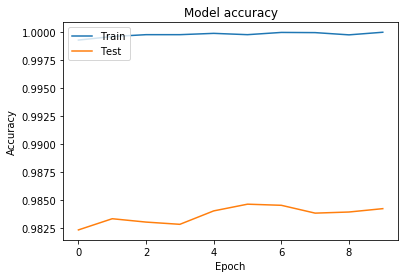

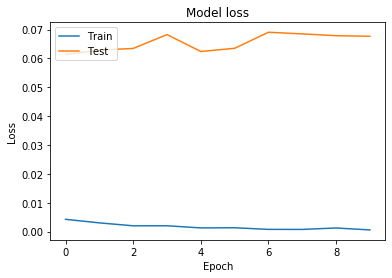

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Obtain model summary

In [0]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Use data augmentation

In [0]:
!pip install talos


     |████████████████████████████████| 26.6MB 1.7MB/s 
     |████████████████████████████████| 839kB 50.1MB/s 
  Created wheel for talos: filename=talos-0.6.3-cp36-none-any.whl size=49626 sha256=35bb37fea695412273b1da0a16bae3146b09871e10f0f433d5b812b20aeb6458
  Stored in directory: /root/.cache/pip/wheels/bb/d7/6b/86fd8b1fc7cfbd2c54796412f86efb5fb6a3a5c734014f6a66
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=fb711c819a889831b106313a6561308540162b6779d7fc02f1ca9645523e21c6
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for astetik: filename=astetik-1.9.9-cp36-none-any.whl size=56960 sha256=3838d532daeba7fdfb30415fa5f36093e9b175cbc0cf55282625256c57f2e893
  Stored in directory: /root/.cache/pip/wheels/ae/70/21/c475cd079ec401dd6e1b9b1d42b4c38554ce12679bfb214aad
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=5bb637268b8bb03676682031

In [0]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

epochs=20

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)



model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=X_train.shape[1:]))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='logcosh',
                  optimizer='Adam',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))



Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0380 - acc: 0.2765 - val_loss: 0.0363 - val_acc: 0.3193
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0360 - acc: 0.3379 - val_loss: 0.0356 - val_acc: 0.3449
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0351 - acc: 0.3606 - val_loss: 0.0340 - val_acc: 0.3894
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0346 - acc: 0.3783 - val_loss: 0.0342 - val_acc: 0.3935
Epoch 5/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0342 - acc: 0.3877 - val_loss: 0.0333 - val_acc: 0.4041
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0339 - acc: 0.3925 - val_loss: 0.0336 - val_acc: 0.3963
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0336 - acc: 0.4028 - val_loss: 0.0331 - val_acc: 0.4149
Epoch 8/20
1563/1563 [==========================

**I got accuracy of 0.4469 on CIFAR10 dataset using ADAM and logcosh as my loss function**

In [0]:
from keras import optimizers,activations
from keras import losses
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10),
     'epochs': [150],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': [keras.optimizers.Adam, keras.optimizers.Nadam, keras.optimizers.RMSprop],
     'losses': [keras.losses.logcosh, keras.losses.binary_crossentropy],
     'activation':[keras.activations.relu, keras.activations.elu],
     'last_activation': [keras.activations.sigmoid]}

# t = ta.Scan(x=x,
#             y=y,
#             model=breast_cancer_model,
#             grid_downsample=0.01, 
#             params=p,
#             dataset_name='breast_cancer',
#             experiment_no='1')
